**EDA: Online Purchase Intention**  

⚡ Author: [Afida Sabrina](https://www.linkedin.com/in/afidasabrinas/) ⚡



In [ ]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
#load dataset
url = 'https://raw.githubusercontent.com/afidas/consumers-purchase-intention/main/online_shoppers_intention.csv'
df = pd.read_csv(url)

# Data Proffiling

Online Purchase Intention dataset is data about consumers' intention when buying a product. It consists of 12.330 buying sessions throughout the year. Eighteen variables consist of `Revenue ` as the class label, ten numeric variables, and eight categorical variables. These variables are grouped into several groups of variables as follows:

1. **Page and Duration**: `Administrative` (account management), `Administrative_Duration`, `Informational` (Web site, communication and address information of the shopping site), `Informational_Duration`, `ProductRelated` and `ProductRelated_Duration`
2. **Google Analytics Metrics**: `BounceRates`, `ExitRates`, and `PageValues`
3. **Time**: `Weekend` and `Month`.
4. **Other variables**: `SpecialDay`, `OperatingSystem`, `Browser`, `Region`, `TrafficType`, `VisitorType`

The report generates insights into the relationship between variables with revenue. Act as a stepping stone to understand predictors which influence customers to finish their transaction.

#Access and Clean Data

In [ ]:
#General picture of how dataframe looks like
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
#Missing value, data types, and shape of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


# Check Target Variable

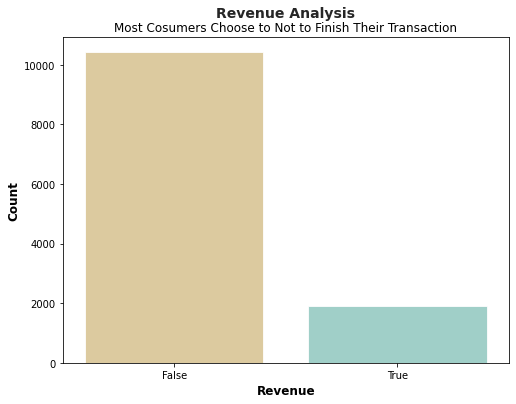

In [ ]:
#Count of revenue
fig, ax = plt.subplots(figsize=(8,6))
sns.set_style("ticks")
sns.set_context("paper")
sns.countplot(x= 'Revenue', data=df, palette='BrBG')

ax.text(x=0.5, y=1.05, s='Revenue Analysis', fontsize=14, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
subtitle_string = "Most Cosumers Choose to Not to Finish Their Transaction"


plt.title(subtitle_string, fontsize = 12)
plt.ylabel("Count", fontsize=12,weight='bold')
plt.xlabel("Revenue",fontsize=12,weight='bold')
plt.show()

In [ ]:
#Count revenue
df.groupby('Revenue').size()

Revenue
False    10422
True      1908
dtype: int64

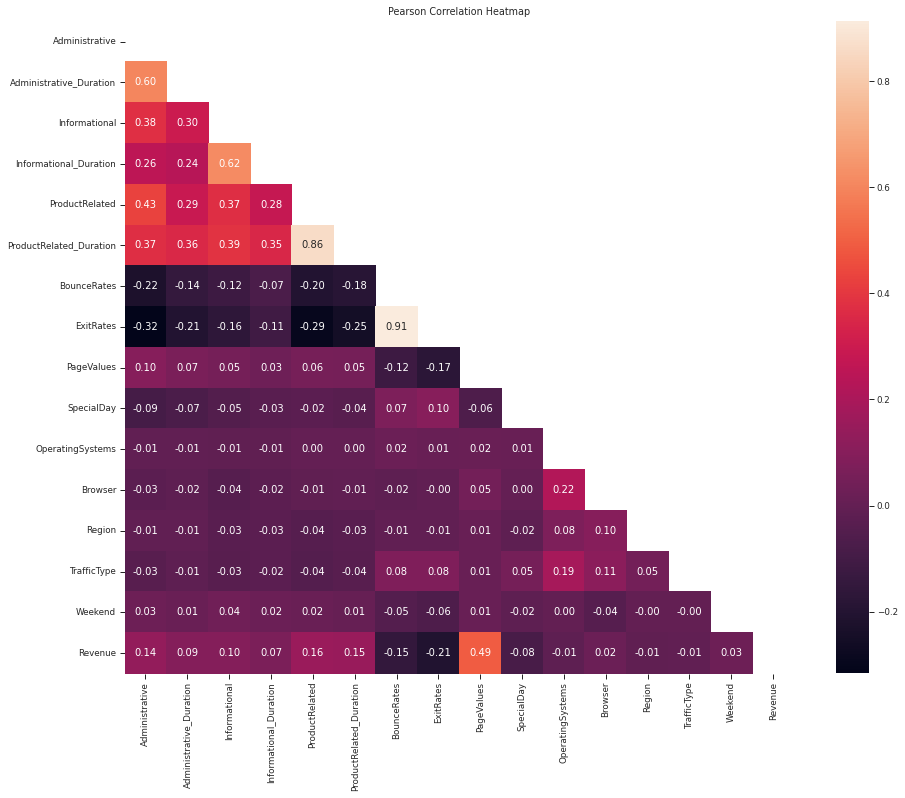

In [ ]:
#check target variable correlation with other variable using heatmap
df_corr = df.corr()
mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(15, 12))
ax = sns.heatmap(df_corr,mask=mask, 
                 annot=True, annot_kws={'size':10}, fmt=".2f")
plt.title("Pearson Correlation Heatmap")
plt.show()

# Month

In [ ]:
#count Month
df.groupby('Month').size()

Month
Aug      433
Dec     1727
Feb      184
Jul      432
June     288
Mar     1907
May     3364
Nov     2998
Oct      549
Sep      448
dtype: int64

In [ ]:
#group data by month
df_by_month = df.groupby(['Month']).sum()
#order dataframe by Revenue
df_by_month.sort_values(by=['Revenue'])

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Month,,,,,,,,,,,,,,,,
Feb,100,3104.525000,16,439.000000,2058,8.666670e+04,8.651934,13.643285,163.826743,43.0,353,401,490,510,28,3
June,655,17029.424392,162,5889.823333,10387,3.494527e+05,10.109304,16.773806,976.734639,0.0,614,667,919,1213,47,29
Jul,1047,34073.722728,223,19664.816667,15728,5.260049e+05,10.660237,19.582716,1773.106673,0.0,905,1028,1475,1591,104,66
Aug,1358,46208.585717,235,15377.720000,16566,5.510590e+05,7.885283,16.335648,2571.184257,0.0,897,1030,1407,1521,96,76
Sep,1494,48977.792121,254,16010.101905,14831,5.615179e+05,5.458009,13.583583,3385.457907,0.0,959,1114,1476,1493,96,86
Oct,2042,69140.700580,268,21228.142381,18428,6.132207e+05,6.505344,15.927259,4746.423532,0.0,1129,1223,1753,2348,144,115
Mar,3600,135838.483159,802,58494.868338,37775,1.549024e+06,41.434902,85.051385,7551.113004,0.0,3964,4370,5785,6062,481,192
Dec,3793,135799.069028,885,65745.780954,48347,1.919510e+06,34.797567,71.329893,11801.010926,0.0,3892,4513,5861,7026,366,216
May,6610,233703.101976,1426,91376.868009,89105,3.303088e+06,90.379267,164.329829,18271.814428,714.4,7132,7969,10546,15060,715,365


In [ ]:
#eliminating Feb since it has a fairly high difference in value with other months
df= df[df["Month"] != 'Feb']

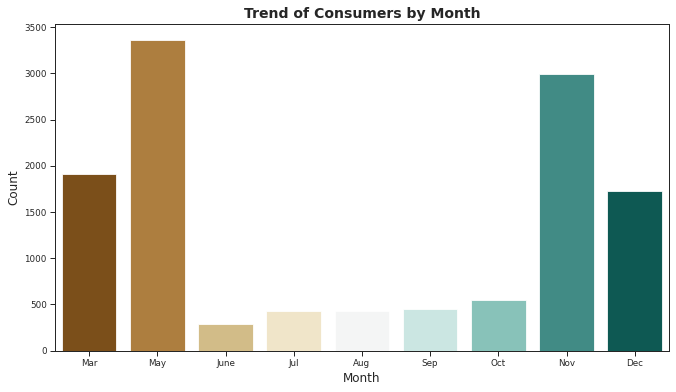

In [ ]:
#Visualizing count of customers
#order month
Months = ['Mar', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
#barplot
sns.set_style("ticks")
sns.set_context("paper")
fig, ax = plt.subplots(figsize=(11,6))

sns.countplot(x='Month', data=df, order=Months,palette='BrBG')

ax.text(x=0.5, y=1.01, s='Trend of Consumers by Month', fontsize=14, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
plt.ylabel("Count", fontsize=12)
plt.xlabel("Month",fontsize=12)
plt.show()


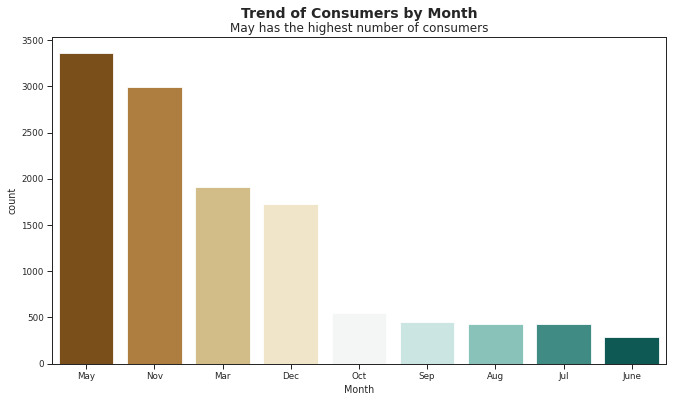

In [ ]:
#count the number of consumers every month

fig, ax = plt.subplots(figsize=(11,6))
sns.set_style("ticks")
sns.set_context("paper")

sns.countplot(x= 'Month', data=df, palette='BrBG',order = df['Month'].value_counts().index)

ax.text(x=0.5, y=1.05, s='Trend of Consumers by Month', fontsize=14, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
subtitle_string = "May has the highest number of consumers"

plt.title(subtitle_string, fontsize = 12)
plt.show()

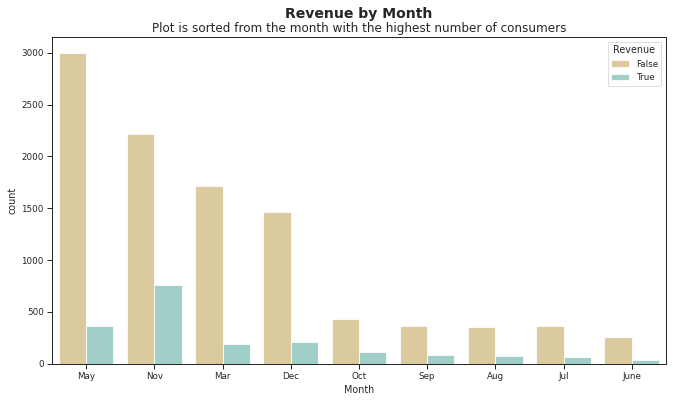

In [ ]:
#count Revenue in Month

fig, ax = plt.subplots(figsize=(11,6))
sns.set_style("ticks")
sns.set_context("paper")

sns.countplot(data=df, hue='Revenue', x='Month',palette= 'BrBG',order = df['Month'].value_counts().index)

ax.text(x=0.5, y=1.05, s='Revenue by Month', fontsize=14, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
subtitle_string = "Plot is sorted from the month with the highest number of consumers"

plt.title(subtitle_string, fontsize = 12)
plt.show()

## Revenue and Engagement

In [ ]:
#feature engineering for sum of page view and page duration 
df['sum_duration'] = df['Administrative_Duration'] + df['Informational_Duration'] + df['ProductRelated_Duration'] 
df['sum_page'] = df['Administrative'] + df['Informational'] + df['ProductRelated'] 

In [ ]:
#count revenue by month

revenue = pd.crosstab(df['Month'], df['Revenue'],margins=True)
#change index to column
revenue['month']=revenue.index
#change column name
revenue.columns = ['no_revenue', 'revenue', 'all','month']
#drop unused row
revenue = revenue.drop([revenue.index[9]])

In [ ]:
#group pageview and duration by month

#group dataset by Month
revenue2 = df.groupby(['Month']).median()
#drop unused column
revenue2 = revenue2.drop(columns=['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates',
                       'ExitRates','PageValues','SpecialDay','OperatingSystems','Browser','Region','TrafficType','Weekend','Revenue'])
#change index into column
revenue2['month']=revenue2.index

In [ ]:
#add revenue-column into page view and page duration table

#add amount of revenue into column
revenue_sum = {76:'Aug', 216:'Dec',66:'Jul',29:'June',192:'Mar',
               365:'May',760:'Nov',115:'Oct',86:'Sep'}
#add column to dataset
revenue2['revenue_sum'] = revenue_sum
#View column by sum_page
revenue2.sort_values(by=['revenue_sum'])

In [ ]:
revenue2.sort_values(by=['revenue_sum'])

,sum_duration,sum_page,month,revenue_sum
Month,,,,
June,501.655556,20.0,June,29
Jul,607.708333,22.0,Jul,66
Aug,798.300000,25.0,Aug,76
Sep,738.925000,24.0,Sep,86
Oct,719.046667,24.0,Oct,115
Mar,513.876191,15.0,Mar,192
Dec,685.750000,19.0,Dec,216
May,602.095238,19.0,May,365
Nov,1048.781798,28.0,Nov,760


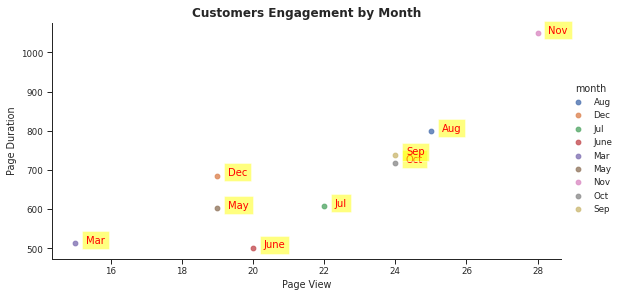

In [ ]:
#visualizing engagement and month
sns.set(rc={'figure.figsize':(12.7,8.8)})
sns.set_style("ticks")
sns.set_context("paper")

ax = sns.lmplot(y='sum_duration',x='sum_page',data=revenue2,hue='month',ci=95,height=4,aspect=2,fit_reg=False)
#show label in point
for i in range(revenue2.shape[0]):
 plt.text(x=revenue2.sum_page[i]+0.3,y=revenue2.sum_duration[i]+0.3,s=revenue2.month[i], 
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))


plt.title('Customers Engagement by Month',weight='bold',fontsize = 12) #title
plt.xlabel('Page View') #x label
plt.ylabel('Page Duration') #y label

plt.show()

## Engagement by Visitor Type

In [ ]:
#count consumers
df.groupby('VisitorType').size()

VisitorType
New_Visitor           1693
Other                   85
Returning_Visitor    10368
dtype: int64

In [ ]:
#eliminate 'Others' in Visitor Type to prevent noise
df= df[df["VisitorType"] != 'Other']

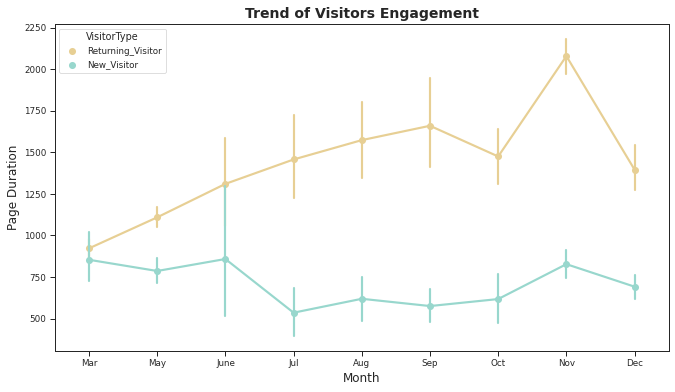

In [ ]:
#point plot visualization
sns.set_style("ticks")
sns.set_context("paper")
#sns.set(rc={'figure.figsize':(10,8)})
fig, ax = plt.subplots(figsize=(11,6))

ax = sns.pointplot(x='Month',y='sum_duration',data=df,hue='VisitorType',ci=95,aspect=2,order=Months,palette= 'BrBG')

ax.text(x=0.5, y=1.01, s='Trend of Visitors Engagement', fontsize=14, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
plt.ylabel("Page Duration", fontsize=12)
plt.xlabel("Month",fontsize=12)
plt.show()

## Engagement and Device

In [ ]:
pd.crosstab(df['OperatingSystems'], df['VisitorType'],margins=True)

VisitorType,New_Visitor,Returning_Visitor,All
OperatingSystems,,,
1,412,2103,2515
2,935,5567,6502
3,272,2247,2519
4,63,405,468
5,0,6,6
6,2,17,19
7,1,6,7
8,8,17,25
All,1693,10368,12061


In [ ]:
os = df.groupby(['OperatingSystems']).sum()
os = os.drop(columns=['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates',
                       'ExitRates','PageValues','SpecialDay', 'Region','TrafficType','Weekend','Browser'])
os.sort_values(by=['Revenue'])

,Browser,Revenue,sum_duration,sum_page
OperatingSystems,,,,
5,66,1,5.094766e+03,78
7,7,1,7.553821e+03,169
6,52,2,2.124860e+04,455
8,65,3,1.085816e+04,327
4,742,85,6.440686e+05,18374
3,5321,268,2.787417e+06,74693
1,3836,378,2.518385e+06,67556
2,17817,1151,1.001312e+07,260978


## Special Day Analysis

In [ ]:
#Count SpecialDay in every Month
df.groupby(['Month', 'SpecialDay'])['Revenue'].aggregate('count').unstack()

SpecialDay,0.0,0.2,0.4,0.6,0.8,1.0
Month,,,,,,
Aug,433.0,NaN,NaN,NaN,NaN,NaN
Dec,1665.0,NaN,NaN,NaN,NaN,NaN
Jul,432.0,NaN,NaN,NaN,NaN,NaN
June,287.0,NaN,NaN,NaN,NaN,NaN
Mar,1907.0,NaN,NaN,NaN,NaN,NaN
May,2192.0,163.0,222.0,332.0,306.0,149.0
Nov,2976.0,NaN,NaN,NaN,NaN,NaN
Oct,549.0,NaN,NaN,NaN,NaN,NaN
Sep,448.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
#count revenue in all SpecialDay category
pd.crosstab(df['SpecialDay'], df['Revenue'],margins=True)

Revenue,False,True,All
SpecialDay,,,
0.0,9075,1814,10889
0.2,149,14,163
0.4,209,13,222
0.6,303,29,332
0.8,296,10,306
1.0,140,9,149
All,10172,1889,12061


# Weekend

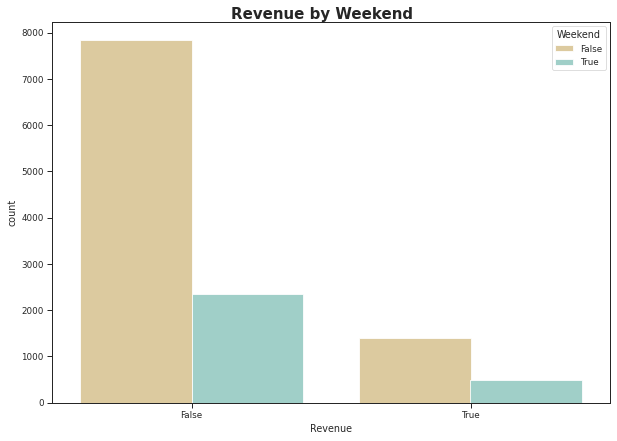

In [ ]:
#count Revenue in Weekend
plt.figure(figsize=(10,7))
sns.set_style("ticks")
sns.set_context("paper")
sns.countplot(data=df, hue='Weekend', x='Revenue',palette= 'BrBG')

title_string = "Revenue by Weekend"

plt.suptitle(title_string, y = 0.91, fontsize = 15,weight='bold')
plt.show()

# Pages Analysis

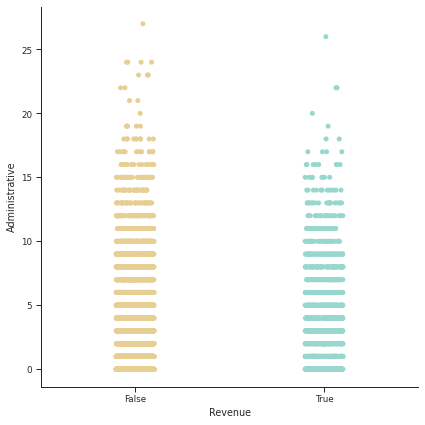

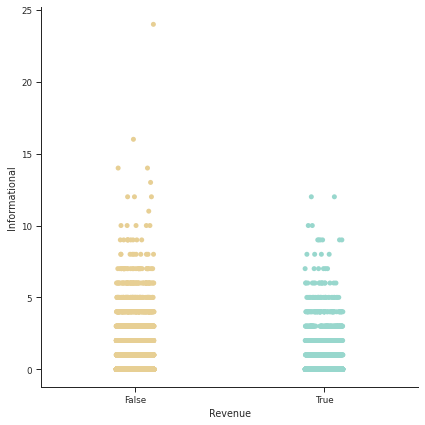

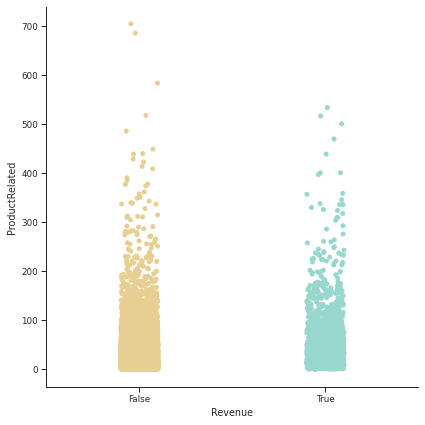

In [ ]:
#distribution of revenue by Administrative

sns.set_style("ticks")
sns.set_context("paper")
sns.catplot(y='Administrative', x='Revenue', data=df,palette= 'BrBG',height=6)
sns.catplot(y='Informational', x='Revenue', data=df,palette= 'BrBG',height=6)
sns.catplot(y='ProductRelated', x='Revenue', data=df,palette= 'BrBG',height=6)


## Zero Value Analysis in Pages

In [ ]:
#Administrative Value in the dataset
df_pages = df[['Administrative','Informational','ProductRelated','Revenue']]
df_pages.sum(axis = 0, skipna = True)

Administrative     28321
Informational       6178
ProductRelated    388131
Revenue             1889
dtype: int64

In [ ]:
#Exclude zero value in Adminstrative
df_administrative = df_pages[df_pages["Administrative"] != 0]
df_administrative.sum(axis = 0, skipna = True)

Administrative     28321
Informational       5304
ProductRelated    286700
Revenue             1381
dtype: int64

In [ ]:
#Filter Administrative value into zero
df_administrative0 = df_pages[df_pages["Administrative"] == 0]
df_administrative0.sum(axis = 0, skipna = True)

Administrative         0
Informational        874
ProductRelated    101431
Revenue              508
dtype: int64

In [ ]:
#Filter Informational ve value into zero
df_Informational0 = df_pages[df_pages["Informational"] == 0]
df_Informational0.sum(axis = 0, skipna = True)

Administrative     16068
Informational          0
ProductRelated    227987
Revenue             1278
dtype: int64

Based on the analysis above consumers will be more likely to finish their transaction if their `Administrative` is not zero. Meanwhile, if the `Administrative` value is zero, the intensity of consumers visiting other pages and finishing transactions will decrease. Zero for `Administrative` has a bigger effect than zero in Informational pages.

## Product Related

Between three types of pages in the dataset, `ProductRelated` affecting revenue the most. For this reason, an analysis is carried out to determine the ideal value to predict whether consumers will make a transaction or not. However, this variable has a very high outlier. Therefore, outliers will not be include in the next analysis to makes the process easier.

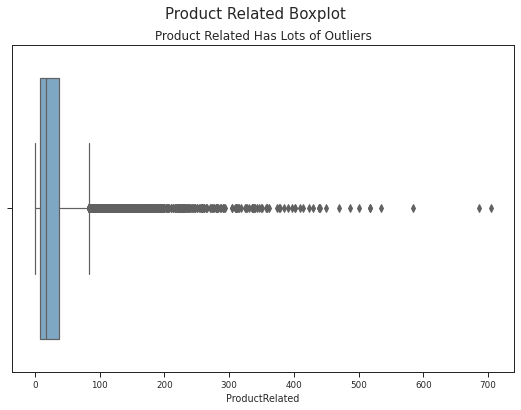

In [ ]:
#outlier analysis of Product Related
plt.figure(figsize=(9,6))
sns.set_style("ticks")
sns.set_context("paper")
sns.boxplot(x= 'ProductRelated', data=df, palette= 'PuBu')

title_string = "Product Related Boxplot"
subtitle_string = "Product Related Has Lots of Outliers"

plt.suptitle(title_string, y = 0.97, fontsize = 15)
plt.title(subtitle_string, fontsize = 12)
plt.show()


In [ ]:
#Divide ProductRelated values into several ranges to find out the distribution
ProductRelated1 = df.ProductRelated[(df.ProductRelated >= 0) & (df.ProductRelated <= 7)]
ProductRelated2 = df.ProductRelated[(df.ProductRelated >= 8) & (df.ProductRelated <= 15)]
ProductRelated3 = df.ProductRelated[(df.ProductRelated >= 16) & (df.ProductRelated <= 23)]
ProductRelated4 = df.ProductRelated[(df.ProductRelated >= 24) & (df.ProductRelated <= 31)]
ProductRelated5 = df.ProductRelated[(df.ProductRelated >= 32) & (df.ProductRelated <= 39)]

prox = ["0-7","8-15","16-23","24-31","32-39"]
proy = [len(ProductRelated1.values),
        len(ProductRelated2.values),
        len(ProductRelated3.values),
        len(ProductRelated4.values),
        len(ProductRelated5.values)]

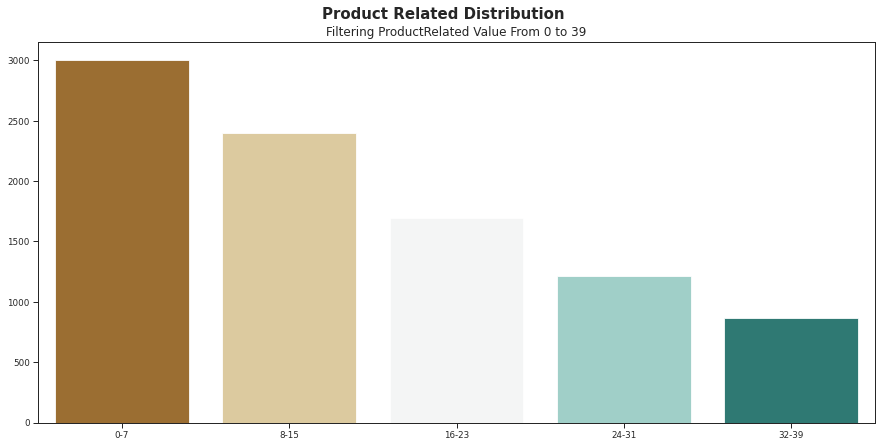

In [ ]:
#ProductRelated distribution in barplot 
plt.figure(figsize=(15,7))
sns.set_style("ticks")
sns.set_context("paper")
sns.barplot(x=prox, y=proy, palette= 'BrBG')

title_string = "Product Related Distribution"
subtitle_string = "Filtering ProductRelated Value From 0 to 39"

plt.suptitle(title_string, y = 0.95, fontsize = 15,weight='bold',ha='center')
plt.title(subtitle_string, fontsize = 12,ha='center')
plt.show()

Most consumers have low `ProductRelated` value, **but** does it related with `Revenue` ?

In [ ]:
#Filter dataset to include ProductRelated which have 0-39 value only
df_ProductRelated = df[(df["ProductRelated"] >= 0) & (df['ProductRelated'] <= 39)]

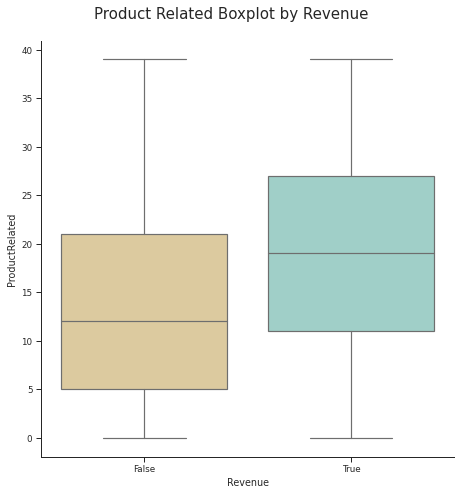

In [ ]:
#Comparing ProductRelated value by Revenue

sns.set_style("ticks")
sns.set_context("paper")
sns.catplot(data=df_ProductRelated, y='ProductRelated',x='Revenue',kind='box',palette= 'BrBG',height=6.5)

title_string = "Product Related Boxplot by Revenue"

plt.suptitle(title_string, y = 1.05, fontsize = 15)
plt.show()


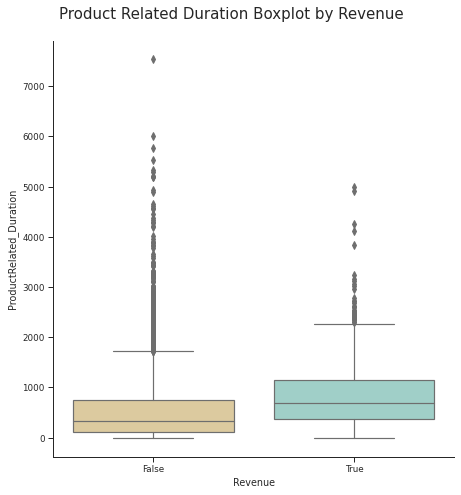

In [ ]:
#Comparing ProductRelated Duration value by Revenue
sns.set_style("ticks")
sns.set_context("paper")
sns.catplot(data=df_ProductRelated, y='ProductRelated_Duration',x='Revenue',kind='box',palette= 'BrBG',height=6.5)

title_string = "Product Related Duration Boxplot by Revenue"

plt.suptitle(title_string, y = 1.05, fontsize = 15)
plt.show()


# Page Values

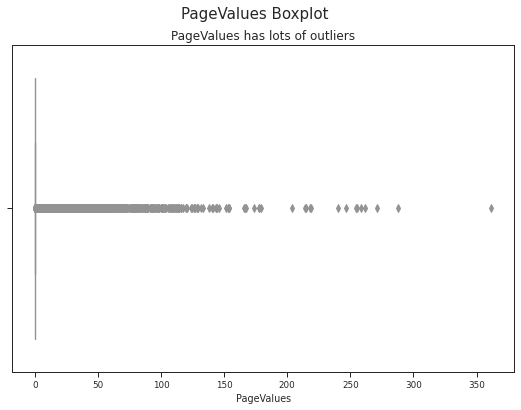

In [ ]:
#outlier analysis of PageValues
plt.figure(figsize=(9,6))
sns.set_style("ticks")
sns.set_context("paper")
sns.boxplot(x= 'PageValues', data=df, palette= 'BrBG')

title_string = "PageValues Boxplot"
subtitle_string = "PageValues has lots of outliers"

plt.suptitle(title_string, y = 0.97, fontsize = 15)
plt.title(subtitle_string, fontsize = 12)
plt.show()

Considering wide range of numbers in `PageValues`, analysis will start by comparing total of consumer with zero `PageValues` and non-zero `PageValues`

In [ ]:
df['Revenue'].value_counts()

False    10172
True      1889
Name: Revenue, dtype: int64

In [ ]:
#filter data with non-zero PageValues
df_PageValues = df[df["PageValues"] != 0]
df_PageValues['Revenue'].value_counts()

True     1521
False    1187
Name: Revenue, dtype: int64

In [ ]:
#filter data with zero PageValues
df_PageValues2 = df[df["PageValues"] == 0]
df_PageValues2['Revenue'].value_counts()

False    8985
True      368
Name: Revenue, dtype: int64

<Figure size 1080x504 with 0 Axes>

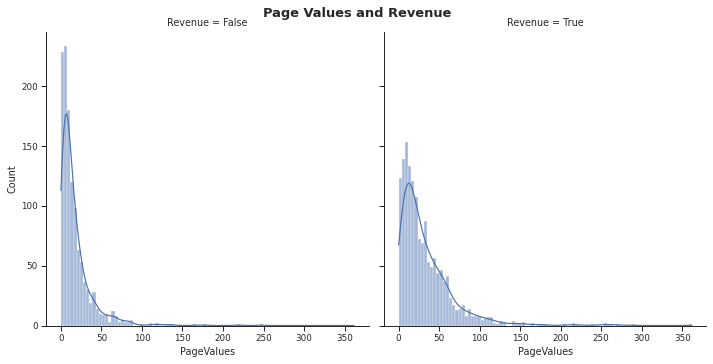

In [ ]:
#Distribution of Revenue based on PageValues
plt.figure(figsize=(15,7))
sns.set_style("ticks")
sns.set_context("paper")
sns.displot(x="PageValues", data=df_PageValues, col='Revenue', kde=True,palette= 'BrBG')

title_string = "Page Values and Revenue"

plt.suptitle(title_string, y = 1.0, fontsize = 13,weight='bold')
plt.show()

Based on the above analysis, it can be seen if consumers will complete the purchase if `PageValues` has greater than zero value. More exact numbers are difficult to come by because false and true `Revenue` have almost same distribution.

# Exit Rates and Bounce Rates

`BounceRates` and `ExitRates` almost have the same goal which is to measure the tendency of consumers to leave before completing a transaction. So, the smaller the value, the better. This pattern seen in the violin plot below. This results makes both variables as good predictors of Revenue.

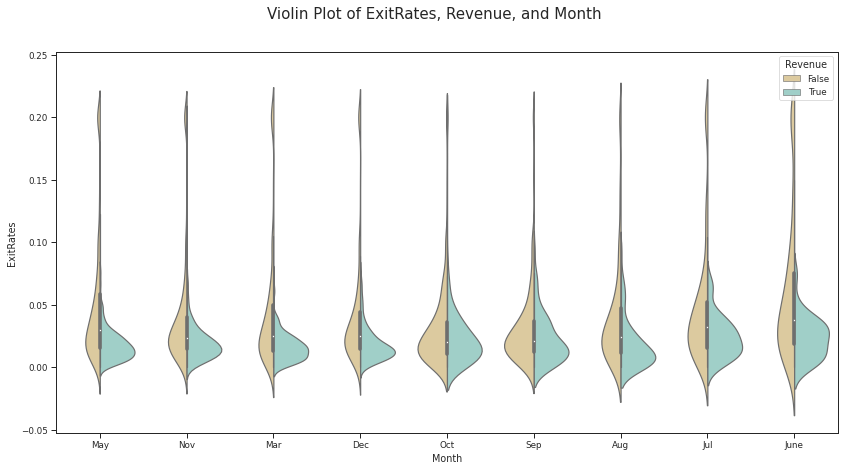

In [ ]:
#distribution of ExitRates and Revenue
plt.figure(figsize=(14,7))
sns.set_style("ticks")
sns.set_context("paper")
sns.violinplot(x=df.Month , y = df.ExitRates , hue= df.Revenue,split=True,palette= 'BrBG',order = df['Month'].value_counts().index)

title_string = "Violin Plot of ExitRates, Revenue, and Month"

plt.suptitle(title_string, y = 0.97, fontsize = 15)
plt.show()

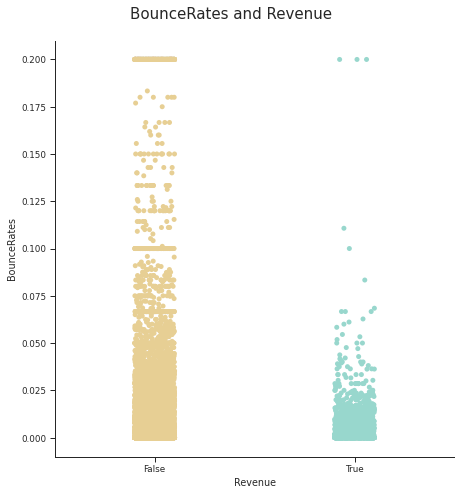

In [ ]:
#distribution of BounceRates and Revenue

sns.set_style("ticks")
sns.set_context("paper")
sns.catplot(y="BounceRates", data=df, x='Revenue', palette= 'BrBG',height=6.5)

title_string = "BounceRates and Revenue"

plt.suptitle(title_string, y = 1.05, fontsize = 15)
plt.show()

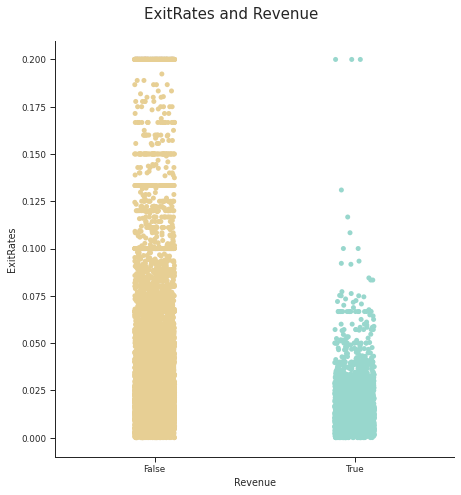

In [ ]:
#distribution of BounceRates and Revenue

sns.set_style("ticks")
sns.set_context("paper")
sns.catplot(y="ExitRates", data=df, x='Revenue', palette= 'BrBG',height=6.5)

title_string = "ExitRates and Revenue"

plt.suptitle(title_string, y = 1.05, fontsize = 15)
plt.show()